In [1]:
import cantera as ct
import numpy as np
import matplotlib.pyplot as plt

In [575]:
# gas = ct.Solution("seiser.cti")  # Change .cti file to standard simple reaction
gas = ct.Solution("2S_methane.cti")
# gas.Y = np.array([0.5, 0, 0.5, 0, 0])
#gas.TP = 1200, 101325
#gas.TD = 1200, 10
def Q(t):
    t0 = 1e-5
    r  = 1e-6
    c  = 0e11
    return c * np.exp(-(t - t0)**2 / r**2) 
#gas.Y = np.ones(gas.n_species) / gas.n_species
gas.TP = 500, 101325
# sim.advance(5.93e-6)
#gas.Y = np.array([0.25, 0.25, 0.25, 0.25, 0, 0])
# gas.set_equivalence_ratio(phi=1.0, fuel='nc7h16', oxidizer={'o2':1.0, 'n2':3.76})
#np.save(".npy files/ini_mass_fraction.npy", gas.Y)
reactor = ct.IdealGasReactor(gas)
res = ct.Reservoir(gas)
wall = ct.Wall(res, reactor)
wall.set_heat_flux(Q)
wall.area = 1.0
exhaust_gas = ct.Solution("2S_methane.cti")
exhaust = ct.Reservoir(exhaust_gas)
mfc = ct.MassFlowController(upstream = reactor, downstream = exhaust, mdot = nozzle_nasa_mdot)  # mdot = nozzle_nasa_mdot
sim = ct.ReactorNet([reactor])
np.save('/home/darve/adncat/yizhou/PSAAP3/Tests/data/density.npy', gas.density)
gas()


  CH4_CM2:

       temperature             500  K
          pressure          101325  Pa
           density        0.779913  kg/m^3
  mean mol. weight         31.9988  amu

                          1 kg            1 kmol
                       -----------      ------------
          enthalpy       1.902e+05        6.086e+06     J
   internal energy           60282        1.929e+06     J
           entropy          6897.1        2.207e+05     J/K
    Gibbs function     -3.2584e+06       -1.043e+08     J
 heat capacity c_p           971.4        3.108e+04     J/K
 heat capacity c_v          711.56        2.277e+04     J/K

                           X                 Y          Chem. Pot. / RT
                     -------------     ------------     ------------
                O2              1                1           -25.08
     [   +5 minor]              0                0



/home/darve/adncat/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Converting `np.integer` or `np.signedinteger` to a dtype is deprecated. The current result is `np.dtype(np.int_)` which is not strictly correct. Note that the result depends on the system. To ensure stable results use may want to use `np.int64` or `np.int32`.
  
/home/darve/adncat/.local/lib/python3.6/site-packages/ipykernel_launcher.py:22: DeprecationWarning: Converting `np.integer` or `np.signedinteger` to a dtype is deprecated. The current result is `np.dtype(np.int_)` which is not strictly correct. Note that the result depends on the system. To ensure stable results use may want to use `np.int64` or `np.int32`.


In [576]:
gas.Y

array([1., 0., 0., 0., 0., 0.])

In [577]:
#gas.TP = 1200, 101325
#gas.set_equivalence_ratio(phi=1.0, fuel='nc7h16', oxidizer={'o2':1.0, 'n2':3.76})
n_t = 400
Pt = np.zeros(n_t+1)
Tt = np.zeros(n_t+1)
Yt = np.zeros((gas.n_species,n_t+1))
Rhot = np.zeros(n_t+1)
Pt[0] = gas.P
Tt[0] = gas.T
Yt[:,0] = gas.Y
Rhot[0] = gas.density
timestep = np.zeros(n_t+1)
timestep[0] = 0
dt = 0
t = 0
for i in range(n_t):
    if (i < 975):
        dt = 1e-4
    else:
        dt = 2e-10
    t += dt
    sim.advance(t)
    timestep[i+1] = t
    #timestep[i+1] = sim.step()
    Pt[i+1] = gas.P
    Tt[i+1] = gas.T
    Yt[:,i+1] = gas.Y
    Rhot[i + 1] = gas.density
gas()
# gas.DP

CanteraError: 
***********************************************************************
CanteraError thrown by CVodesIntegrator::integrate:
CVodes error encountered. Error code: -10
At t = 8.80777e-06 repeated recoverable right-hand side function errors.

Exceptions caught during RHS evaluation:

***********************************************************************
Exception thrown by Python callback function:
AssertionError: 
***********************************************************************


***********************************************************************
Exception thrown by Python callback function:
AssertionError: 
***********************************************************************


***********************************************************************
Exception thrown by Python callback function:
AssertionError: 
***********************************************************************


***********************************************************************
Exception thrown by Python callback function:
AssertionError: 
***********************************************************************


***********************************************************************
Exception thrown by Python callback function:
AssertionError: 
***********************************************************************


***********************************************************************
Exception thrown by Python callback function:
AssertionError: 
***********************************************************************


***********************************************************************
Exception thrown by Python callback function:
AssertionError: 
***********************************************************************


***********************************************************************
Exception thrown by Python callback function:
AssertionError: 
***********************************************************************


***********************************************************************
Exception thrown by Python callback function:
AssertionError: 
***********************************************************************


***********************************************************************
Exception thrown by Python callback function:
AssertionError: 
***********************************************************************


***********************************************************************
Exception thrown by Python callback function:
AssertionError: 
***********************************************************************


***********************************************************************
Exception thrown by Python callback function:
AssertionError: 
***********************************************************************


***********************************************************************
Exception thrown by Python callback function:
AssertionError: 
***********************************************************************

Components with largest weighted error estimates:
0: -6.38947e+07
2: -2.33322e+07
1: 0
3: 0
4: 0
5: 0
6: 0
7: 0
8: 0
***********************************************************************


In [579]:
gas()


  CH4_CM2:

       temperature         499.999  K
          pressure          101324  Pa
           density        0.779907  kg/m^3
  mean mol. weight         31.9988  amu

                          1 kg            1 kmol
                       -----------      ------------
          enthalpy       1.902e+05        6.086e+06     J
   internal energy           60281        1.929e+06     J
           entropy          6897.1        2.207e+05     J/K
    Gibbs function     -3.2583e+06       -1.043e+08     J
 heat capacity c_p           971.4        3.108e+04     J/K
 heat capacity c_v          711.56        2.277e+04     J/K

                           X                 Y          Chem. Pot. / RT
                     -------------     ------------     ------------
                O2              1                1           -25.08
     [   +5 minor]              0                0



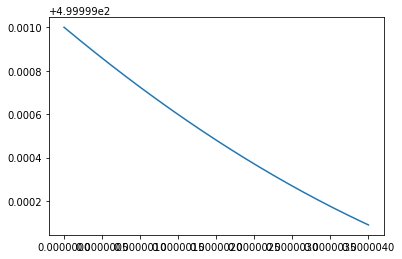

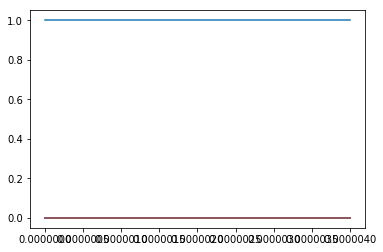

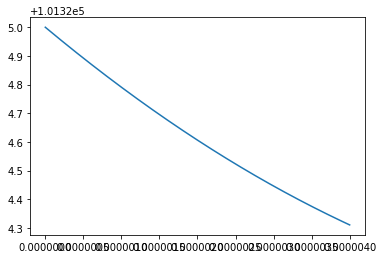

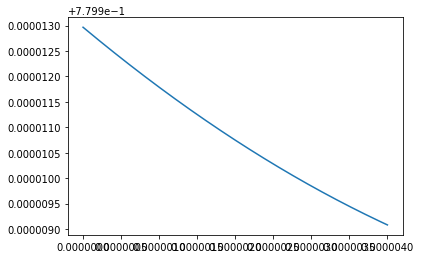

In [569]:
plt.plot(timestep, Tt)
plt.figure()
# plt.plot(Tt)
for i in range(gas.n_species):
    plt.plot(timestep,Yt[i,:])

plt.figure()
plt.plot(timestep,Pt)
plt.figure()
plt.plot(timestep,Rhot)
####

In [534]:
np.save('/home/darve/adncat/yizhou/PSAAP3/Tests/data/pressure.npy', Pt)
np.save('/home/darve/adncat/yizhou/PSAAP3/Tests/data/temperature.npy', Tt)
np.save('/home/darve/adncat/yizhou/PSAAP3/Tests/data/mass_fraction.npy', Yt)
np.save('/home/darve/adncat/yizhou/PSAAP3/Tests/data/timestep.npy', timestep)
np.save('/home/darve/adncat/yizhou/PSAAP3/Tests/data/total_mass.npy', Rhot)
gas.density

0.34501148899345613

In [70]:
# gas = ct.Solution("2S_methane.cti")
# gas.Y = np.ones(gas.n_species) / gas.n_species
# gas.TP = 1200, 101325
# print(gas.density)
# r1 = ct.IdealGasReactor(gas)
# exhaust_gas = ct.Solution("2S_methane.cti")
# exhaust = ct.Reservoir(exhaust_gas)
# mfc = ct.MassFlowController(upstream = r1, downstream = exhaust, mdot = 1e4)  # mdot = nozzle_nasa_mdot
# sim = ct.ReactorNet([r1]) 


gas = ct.Solution("2S_methane.cti")
# gas.Y = np.array([0.5, 0, 0.5, 0, 0])
#gas.TP = 1200, 101325
#gas.TD = 1200, 10
def Q(t):
    t0 = 1e-5
    r  = 1e-6
    c  = 5e11
    return c * np.exp(-(t - t0)**2 / r**2) 
gas.Y = np.ones(gas.n_species) / gas.n_species
gas.TP = 1200, 101325
# sim.advance(5.93e-6)
#gas.Y = np.array([0.25, 0.25, 0.25, 0.25, 0, 0])
# gas.set_equivalence_ratio(phi=1.0, fuel='nc7h16', oxidizer={'o2':1.0, 'n2':3.76})
#np.save(".npy files/ini_mass_fraction.npy", gas.Y)
r1 = ct.IdealGasReactor(gas)
res = ct.Reservoir(gas)
wall = ct.Wall(res, reactor)
wall.set_heat_flux(Q)
wall.area = 1.0
exhaust_gas = ct.Solution("2S_methane.cti")
exhaust = ct.Reservoir(exhaust_gas)
mfc = ct.MassFlowController(upstream = r1, downstream = exhaust, mdot = nozzle_nasa_mdot)  # mdot = nozzle_nasa_mdot
sim = ct.ReactorNet([r1])

Pt = np.zeros(n_t)
Tt = np.zeros(n_t)
Yt = np.zeros((gas.n_species,n_t))
timestep = np.zeros(n_t+1)
timestep[0] = 0
dt = 0
t = 0
for i in range(n_t):
    if (n_t < 125):
        dt = 8e-6
    else:
        dt = 16e-11
    t += (i+1)*dt
    sim.advance(t)
    timestep[i+1] = t
    #timestep[i+1] = sim.step()
    Pt[i] = gas.P
    Tt[i] = gas.T
    Yt[:,i] = gas.Y

/home/darve/adncat/.local/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: Converting `np.integer` or `np.signedinteger` to a dtype is deprecated. The current result is `np.dtype(np.int_)` which is not strictly correct. Note that the result depends on the system. To ensure stable results use may want to use `np.int64` or `np.int32`.
  if sys.path[0] == '':
/home/darve/adncat/.local/lib/python3.6/site-packages/ipykernel_launcher.py:32: DeprecationWarning: Converting `np.integer` or `np.signedinteger` to a dtype is deprecated. The current result is `np.dtype(np.int_)` which is not strictly correct. Note that the result depends on the system. To ensure stable results use may want to use `np.int64` or `np.int32`.


In [3]:

def nozzle_nasa_mdot(t):
    # Can represent mass inflow by increasing combined gas's density
    """
    Compute the efflux of the combustor via simple isentropic relations.
    The efficiency of the nozzle is modeled using a discharge coefficient
    :param t: time
    :return: mass flux at the outlet (efflux) of the combustion chamber.
    """
    # Avoid a unity pressure ratio at startup
    # print(gas.T)
    epsilon = 1.0
    _rho = gas.density
    _press = gas.P
    _area = 1  # arbitrarily chosen value, [m^2]
    _gamma_s = gas.cp / gas.cv
    _temp = gas.T
    _r_gas_specific = gas.cp - gas.cv
    _p_ratio = 101325 / (gas.P + epsilon)  # Exhaust pressure is atmospheric pressure

    power_1 = 2.0 / _gamma_s
    power_2 = (_gamma_s + 1.0) / (_gamma_s)
    pressure_term = _p_ratio ** power_1 - _p_ratio ** power_2
    _sqrt_term = 2. * _gamma_s * _r_gas_specific * _temp / (_gamma_s - 1.0)
    _sqrt_term *= pressure_term
    assert (_sqrt_term >= 0.0)
    _sqrt_term = np.sqrt(_sqrt_term)

    _mdot_unchoked = _rho * _area * _sqrt_term

    power = (_gamma_s + 1.0) / (_gamma_s - 1.0)
    _gamma_term = (2. / (_gamma_s + 1.0)) ** power
    _sqrt = np.sqrt(_gamma_s * _r_gas_specific * _temp * _gamma_term)
    _mdot_choked = _rho * _area * _sqrt

    _mdot = 0.0
    _p_crit_downstream = _press * (2. / (_gamma_s + 1.0)) ** (_gamma_s / (_gamma_s - 1.0))

    if _p_crit_downstream < 101325:  # Less than exhaust pressure = P_atm
        # Unchoked conditions
        _mdot = _mdot_unchoked
    else:
        # Choked conditions
        _mdot = _mdot_choked

    return _mdot  # * _geom_nozzle['C_d']  # Discharge coefficient

In [508]:
gas.cp / gas.cv

1.292313876045469

In [510]:
gas.density

0.601279332122976

In [511]:
epsilon = 1.0
_rho = gas.density
_press = gas.P
_area = 1  # arbitrarily chosen value, [m^2]
_gamma_s = gas.cp / gas.cv
_temp = gas.T
_r_gas_specific = gas.cp - gas.cv
_p_ratio = 101325 / (gas.P + epsilon)  # Exhaust pressure is atmospheric pressure

power_1 = 2.0 / _gamma_s
power_2 = (_gamma_s + 1.0) / (_gamma_s)
pressure_term = _p_ratio ** power_1 - _p_ratio ** power_2
_sqrt_term = 2. * _gamma_s * _r_gas_specific * _temp / (_gamma_s - 1.0)
_sqrt_term *= pressure_term
assert (_sqrt_term >= 0.0)
_sqrt_term = np.sqrt(_sqrt_term)

_mdot_unchoked = _rho * _area * _sqrt_term

power = (_gamma_s + 1.0) / (_gamma_s - 1.0)
_gamma_term = (2. / (_gamma_s + 1.0)) ** power
_sqrt = np.sqrt(_gamma_s * _r_gas_specific * _temp * _gamma_term)
_mdot_choked = _rho * _area * _sqrt

_mdot = 0.0
_p_crit_downstream = _press * (2. / (_gamma_s + 1.0)) ** (_gamma_s / (_gamma_s - 1.0))

if _p_crit_downstream < 101325:  # Less than exhaust pressure = P_atm
    # Unchoked conditions
    _mdot = _mdot_unchoked
else:
    # Choked conditions
    _mdot = _mdot_choked

In [518]:
2. * _gamma_s * _r_gas_specific * _temp / (_gamma_s - 1.0)

1490009.0557754834

In [519]:
pressure_term

2.2323153759939984e-06

In [520]:
_p_ratio

0.9999901308647337

In [521]:
power_1

1.5476116422428876

In [522]:
power_2

1.7738058211214438